> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMBD Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Questions: 
######  Question 1 budget range over the years?
###### Question  2 Revenue range over the years?
###### Question 3 Count of movies that produce over years? 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline



UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [4]:
df.shape

(10866, 21)

In [5]:
## infprmation about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
## drop the duplicated values 
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

In [7]:
## drop Unused columns 
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'keywords', 'popularity', 'release_date', 'genres', 'revenue_adj', 'budget_adj', 'runtime', 'production_companies','tagline', 'overview'], axis=1, inplace = True)

df.shape

(10865, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 6 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 551.7+ KB


In [13]:
df.budget.replace(0, np.NAN, inplace=True)
df.revenue.replace(0, np.NAN, inplace=True)

In [14]:
## drop rows that have Null values 
df.dropna()

,budget,revenue,original_title,vote_count,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,5562,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,6185,7.1,2015
2,110000000.0,2.952382e+08,Insurgent,2480,6.3,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,5292,7.5,2015
4,190000000.0,1.506249e+09,Furious 7,2947,7.3,2015
5,135000000.0,5.329505e+08,The Revenant,3929,7.2,2015
6,155000000.0,4.406035e+08,Terminator Genisys,2598,5.8,2015
7,108000000.0,5.953803e+08,The Martian,4572,7.6,2015
8,74000000.0,1.156731e+09,Minions,2893,6.5,2015
9,175000000.0,8.537086e+08,Inside Out,3935,8.0,2015


In [15]:
df.describe()

,budget,revenue,vote_count,vote_average,release_year
count,5.169000e+03,4.849000e+03,10865.000000,10865.000000,10865.000000
mean,3.073958e+07,8.923886e+07,217.399632,5.975012,2001.321859
std,3.890441e+07,1.620801e+08,575.644627,0.935138,12.813260
min,1.000000e+00,2.000000e+00,10.000000,1.500000,1960.000000
25%,6.000000e+06,7.732325e+06,17.000000,5.400000,1995.000000
50%,1.700000e+07,3.185308e+07,38.000000,6.000000,2006.000000
75%,4.000000e+07,9.996575e+07,146.000000,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000


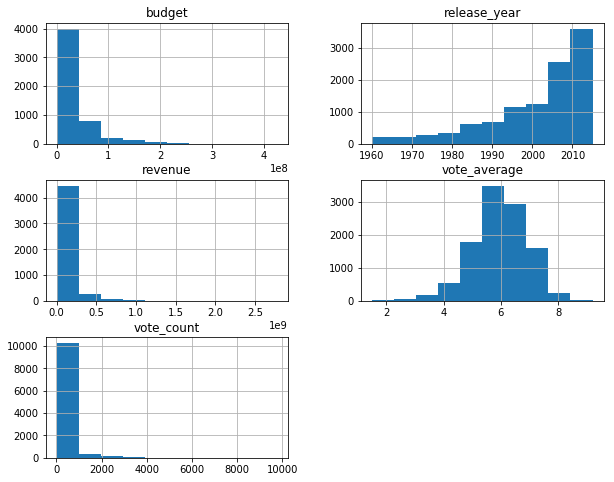

In [16]:
df.hist(figsize=(10, 8));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 budget range over the years?

In [19]:
df.groupby('release_year').budget.mean()

release_year
1960    2.450772e+06
1961    3.549000e+06
1962    3.908723e+06
1963    6.666500e+06
1964    3.589378e+06
1965    6.382283e+06
1966    4.796233e+06
1967    5.591789e+06
1968    4.795933e+06
1969    4.212909e+06
1970    8.464463e+06
1971    3.304217e+06
1972    2.134074e+06
1973    3.621710e+06
1974    3.665238e+06
1975    4.019929e+06
1976    7.185294e+06
1977    5.984444e+06
1978    7.740630e+06
1979    1.061725e+07
1980    1.169355e+07
1981    8.898995e+06
1982    1.250843e+07
1983    1.297769e+07
1984    1.350393e+07
1985    1.361310e+07
1986    1.174223e+07
1987    1.266885e+07
1988    1.381116e+07
1989    1.635843e+07
1990    2.114626e+07
1991    2.403661e+07
1992    2.218101e+07
1993    1.999583e+07
1994    2.622597e+07
1995    3.048813e+07
1996    3.098355e+07
1997    4.095764e+07
1998    4.090600e+07
1999    3.869285e+07
2000    3.994931e+07
2001    3.945415e+07
2002    3.550988e+07
2003    4.078338e+07
2004    3.918219e+07
2005    3.547480e+07
2006    3.462647e+07


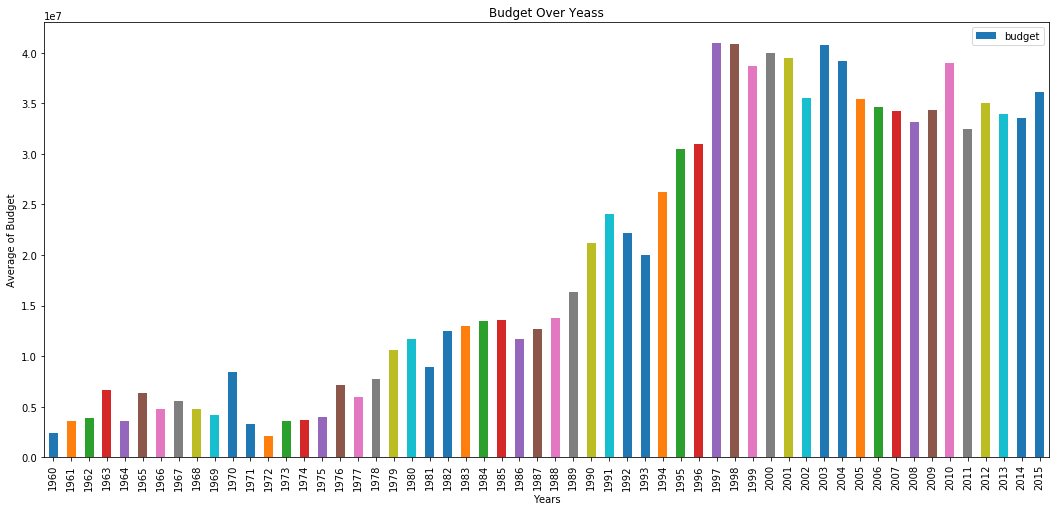

In [26]:
##visualizations
df.groupby('release_year').budget.mean().plot.bar(figsize=(18,8), label='budget')
plt.title('Budget Over Yeass')
plt.xlabel('Years')
plt.ylabel('Average of Budget');
plt.legend();

This figure shows the budget average from 1960 to 2015. According to the figure, budget increase more than 50% in last 10 years comparesion to the first 10 years 

### Research Question 2  Revenue range over years?


In [21]:
df.groupby('release_year').revenue.mean()

release_year
1960    2.071500e+07
1961    3.377202e+07
1962    2.395332e+07
1963    2.677214e+07
1964    4.262272e+07
1965    9.161637e+07
1966    1.694734e+07
1967    5.270247e+07
1968    2.206108e+07
1969    4.879142e+07
1970    4.309400e+07
1971    2.892219e+07
1972    4.947302e+07
1973    7.199889e+07
1974    4.779646e+07
1975    6.383266e+07
1976    5.006285e+07
1977    9.085763e+07
1978    5.707415e+07
1979    6.239981e+07
1980    4.535032e+07
1981    4.436516e+07
1982    6.146110e+07
1983    4.437556e+07
1984    4.972688e+07
1985    4.292198e+07
1986    3.951024e+07
1987    4.808479e+07
1988    4.616729e+07
1989    6.707693e+07
1990    6.902814e+07
1991    6.723714e+07
1992    7.412382e+07
1993    6.439955e+07
1994    8.155666e+07
1995    9.156341e+07
1996    7.991819e+07
1997    9.958106e+07
1998    8.955825e+07
1999    9.623485e+07
2000    9.890722e+07
2001    1.047663e+08
2002    1.053498e+08
2003    1.089082e+08
2004    1.024014e+08
2005    8.976541e+07
2006    7.900844e+07


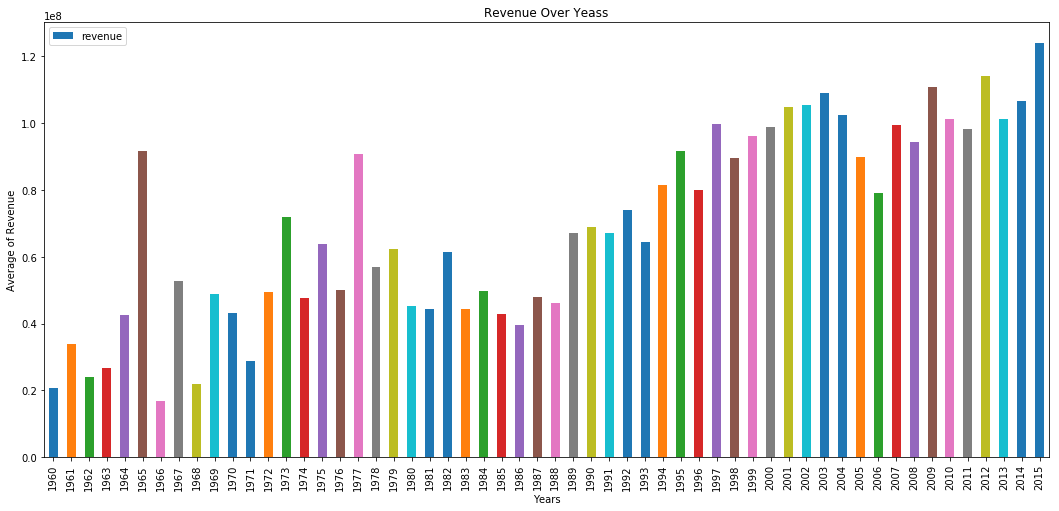

In [27]:
##visualizations
df.groupby('release_year').revenue.mean().plot.bar(figsize=(18,8), label='revenue')
plt.title('Revenue Over Yeass')
plt.xlabel('Years')
plt.ylabel('Average of Revenue');
plt.legend();

This figure shows the Revenue average from 1960 to 2015.

### Budget Vs Revenue 

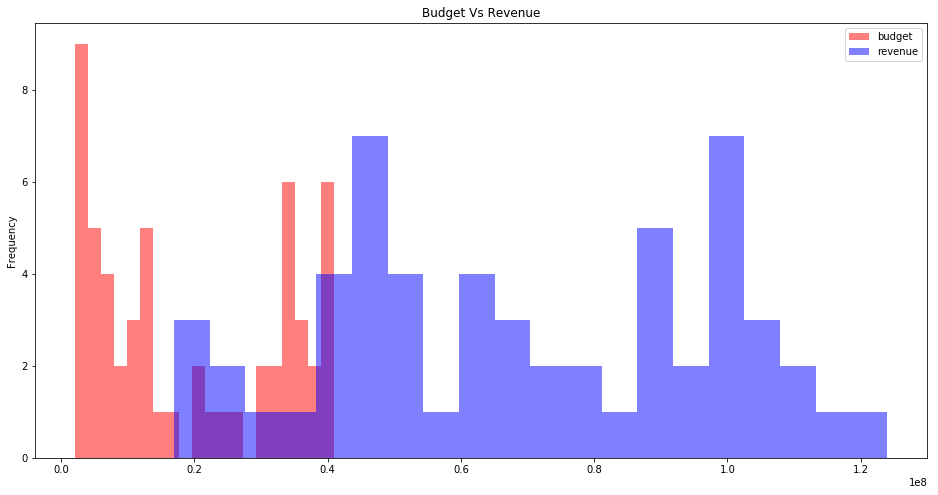

In [31]:
df.groupby('release_year').budget.mean().plot.hist(alpha=0.5, bins= 20, color='red', figsize=(16,8), label='budget')
df.groupby('release_year').revenue.mean().plot.hist(alpha=0.5, bins= 20, color='blue', figsize=(16,8), label='revenue')
plt.title('Budget Vs Revenue')
plt.legend();

### Research Question 3  Count of movies that produce over years?

In [24]:
df.groupby('release_year').original_title.count()

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: original_title, dtype: int64

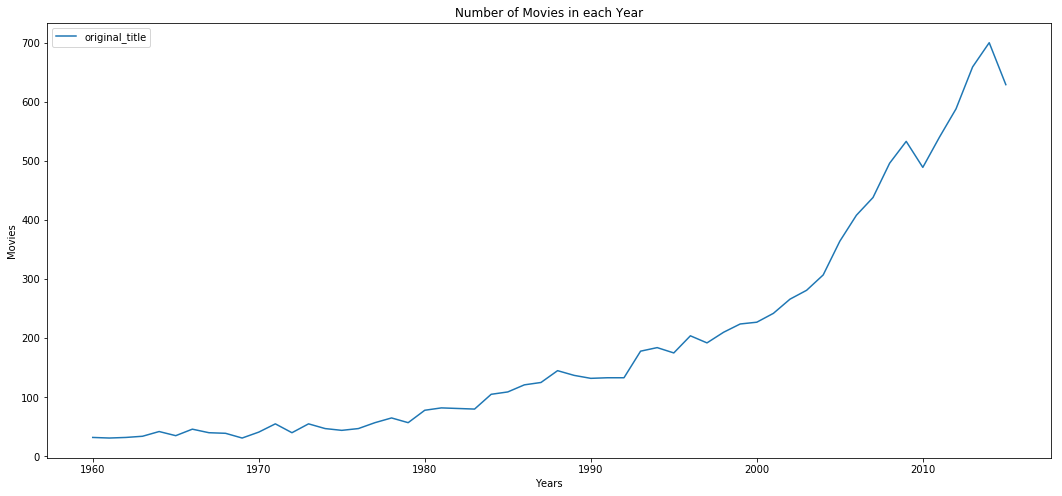

In [29]:
df.groupby('release_year').original_title.count().plot(figsize=(18,8))
plt.title('Number of Movies in each Year')
plt.xlabel('Years')
plt.ylabel('Movies');
plt.legend();

This Figure shows the number of movies that produced in each year from 1960 to 2015 and it is clearly show how inrease producing movies during this years

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

     1- the highest budget was in 1998 and 1997. in 2004, it was close to the highst. 
     2- the lowest budget was in 1972.
     3- the highest revenue was in 2015.
     4- the lowest revenue was in 1966.
     5- Movies that produce increase during years.
     6- the most produced movies was in 2014.


> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!